<!-- importing data and reading it  -->

In [479]:
import pandas as pd

df = pd.read_csv('online_retail_II.csv')



# Knowing about the data

In [480]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [482]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [483]:
df['Description'].value_counts().head(5)

Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
Name: count, dtype: int64

<!-- #two colum have null values (customer_id,description) -->

In [485]:
df.duplicated().sum()

np.int64(34335)

<!-- there are 34335 duplicated entries -->

In [487]:
df['Quantity'].describe()

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

In [488]:
df['Price'].describe()

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
25%      1.250000e+00
50%      2.100000e+00
75%      4.150000e+00
max      3.897000e+04
Name: Price, dtype: float64

In [489]:
df.shape

(1067371, 8)

In [490]:
#drop duplicate values but do all this changes in duplicate dataset this gives you chances to preserve orignal dataset
dc = df.copy()

In [491]:
dc.shape

(1067371, 8)

In [492]:
dc=dc.drop_duplicates()
dc.shape

(1033036, 8)

In [493]:
dc=dc.dropna(subset=['Description','Customer ID'])


In [494]:
dc.shape

(797885, 8)

In [495]:
#keeping only non negative entries of quantities and keep negative as rreturn quantity
return_quantity = dc[dc['Quantity']<0]
dc = dc[dc['Quantity']>=0]

In [496]:
dc.shape

(779495, 8)

In [524]:
dc[dc['Price']<0].count() #their are no entry with neg price

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
dtype: int64

In [523]:
dc.shape 


(779495, 9)

In [500]:
len(dc['Customer ID'].unique())
dc['Total_price'] = dc['Quantity']*dc['Price']

In [501]:
dc[dc['Total_price']<0].count()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
dtype: int64

In [579]:
dc.shape,

((779495, 9),)

In [503]:
print(dc.isnull().sum(),dc.duplicated().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
dtype: int64 0


In [504]:
unq_description = dc['Description'].unique()


In [505]:
len(unq_description)

5283

In [506]:
#there are 5283 Unique description out of 779425

In [507]:
dc['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [508]:
len(dc['StockCode'].unique())  #there are 4631 Unique StockCode out of 779425

4631

In [509]:
len(dc['Invoice'].unique())

36975

In [582]:
dc['InvoiceDate'] = pd.to_datetime(dc['InvoiceDate'])
dc['Customer ID'] = dc['Customer ID'].astype('int64')

In [583]:
dc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [512]:
dc.shape

(779495, 9)

In [513]:
dc['Country'].value_counts().head()

Country
United Kingdom    700434
Germany            16440
EIRE               15567
France             13512
Netherlands         5090
Name: count, dtype: int64

In [514]:
dc.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [515]:
##solving clustering problem

In [516]:
rfe = dc['InvoiceDate'].max()

dataset = dc.groupby('Customer ID').agg({'InvoiceDate': lambda x: (rfe-x.max()).days,
                                        'Invoice':'nunique',
                                        'Total_price':'sum'})
dataset.columns = ['Recency','Frequency','Monetary']
dataset.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,12,77556.46
12347,1,8,4921.53
12348,74,5,2019.40
12349,18,4,4428.69
12350,309,1,334.40


In [586]:
dataset.shape

(5881, 4)

## we have 5878 customers and we have to cluster this customer based on given three features 

In [518]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset[['Recency','Frequency','Monetary']])

# Elbow method to choose optimal K

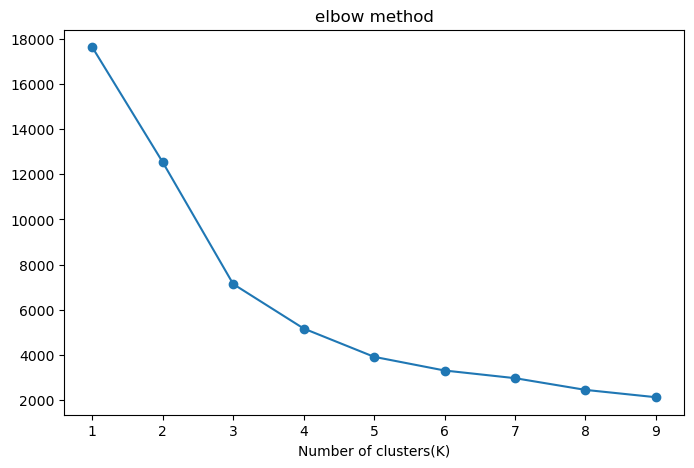

In [569]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

i = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_dataset)
    i.append(kmeans.inertia_)
i
plt.figure(figsize=(8,5))
plt.plot(range(1,10),i,marker='o')
plt.title('elbow method')
plt.xlabel('Number of clusters(K)')
plt.show()


In [543]:
kmeans = KMeans(n_clusters=3,random_state=42)
dataset['cluster'] = kmeans.fit_predict(scaled_dataset)


In [578]:
for k in range(3):
    print(dataset[dataset['cluster']==k].count())

Recency      3849
Frequency    3849
Monetary     3849
cluster      3849
dtype: int64
Recency      2010
Frequency    2010
Monetary     2010
cluster      2010
dtype: int64
Recency      22
Frequency    22
Monetary     22
cluster      22
dtype: int64


In [522]:
# so from above we can see there are 22 customer which are very important for our buisness and 2010 are customer who buy less from our store so we can run discount to attract them

In [577]:
sc = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_dataset)
    labels = kmeans.labels_
    
    

    score  = silhouette_score(scaled_dataset,labels)
    sc.append(score)

    print(k,score)


    

2 0.5567326705253075
3 0.5827973197424813
4 0.5913580190542574
5 0.6009022718066667
6 0.549640412849598
